# Audio Feature Extraction using Librosa

####Author: Subhojeet Pramanik

###Import libraries

In [254]:
%matplotlib inline  
import librosa
import librosa.display
import IPython
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [255]:
audio = librosa.util.example_audio_file() 
y,sr=librosa.load(audio)

###Audio Overview

In [256]:
print('Audio Sampling Rate: '+str(sr)+' samples/sec')
print('Total Samples: '+str(np.size(y)))
secs=np.size(y)/sr
print('Audio Length: '+str(secs)+' s')
IPython.display.Audio(audio)

Audio Sampling Rate: 22050 samples/sec
Total Samples: 1355168
Audio Length: 61.45886621315193 s


##Feature Extraction

To determine the music genre of a music piece, a
number of content-based features are first extracted. In
general, the features employed for music classification can
be roughly categorized into three classes: timbral texture,
rhythmic features, and pitch content features. 

Timbral features are generally characterized by the properties
related to instrumentations or sound sources such as music,
speech, or environment signals. The features used to
represent the timbral texture of a music track include zero
crossing, spectral centroid, spectral flux, spectral rolloff,
Mel-frequency cepstral coefficients (MFCC),
Daubechies wavelet coefficients histograms (DWCH),
and octave-based spectral contrast (OSC), etc. 

Rhythmic features provide the main beat and its strength of
a music track. Several beat-tracking algorithms have been
proposed to estimate the main beat and the corresponding
strength. Pitch features, mainly derived from the
pitch histogram, describe the melody of the music. 
###Seperation of Harmonic and Percussive Signals

/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


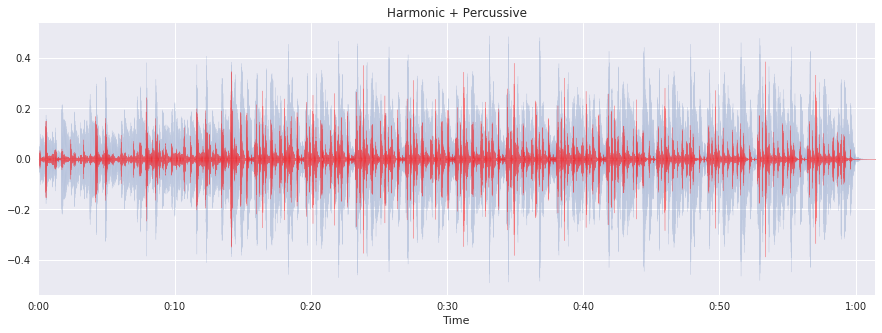

In [257]:
y_harmonic, y_percussive = librosa.effects.hpss(y)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(y_harmonic, sr=sr, alpha=0.25)
librosa.display.waveplot(y_percussive, sr=sr, color='r', alpha=0.5)
plt.title('Harmonic + Percussive')

###1. Beat Extraction
The output of the beat tracker is an estimate of the tempo (in beats per minute), and an array of frame numbers corresponding to detected beat events.

Frames here correspond to short windows of the signal (y), each separated by hop_length = 512 samples. Since v0.3, librosa uses centered frames, so that the kth frame is centered around sample k 

We will use the average tempo of the song as a feature.

Detected Tempo: 129.19921875 beats/min


/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


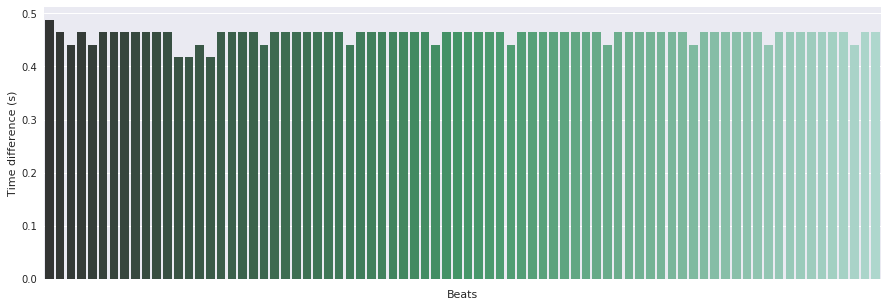

In [258]:
tempo, beat_frames = librosa.beat.beat_track(y=y_harmonic, sr=sr)
print('Detected Tempo: '+str(tempo)+ ' beats/min')
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
beat_time_diff=np.ediff1d(beat_times)
beat_nums = np.arange(1, np.size(beat_times))

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
ax.set_ylabel("Time difference (s)")
ax.set_xlabel("Beats")
g=sns.barplot(beat_nums, beat_time_diff, palette="BuGn_d",ax=ax)
g=g.set(xticklabels=[])


###2. Chroma Energy Normalized (CENS)

Calculate the Chroma Energy Normalized (CENS) for the audio file. A 12-element representation of the spectral energy where the bins represent the 12 equal-tempered pitch classes of western-type music (semitone spacing).


/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


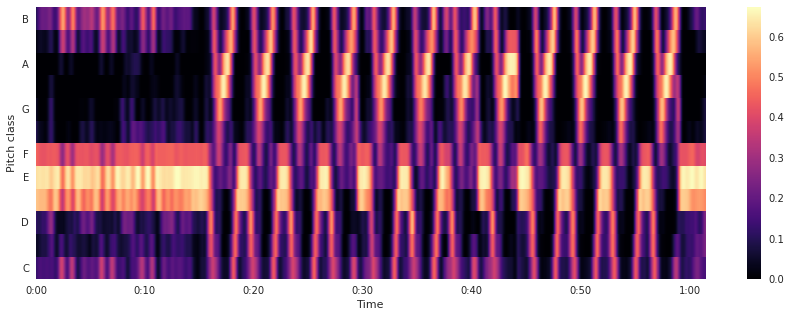

In [259]:
chroma=librosa.feature.chroma_cens(y=y_harmonic, sr=sr)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chroma,y_axis='chroma', x_axis='time')
plt.colorbar()

###3. Calculate MFCCs

Mel-frequency cepstral coefficients (MFCCs) are coefficients that collectively make up an MFC. They are derived from a type of cepstral representation of the audio clip (a nonlinear "spectrum-of-a-spectrum"). The difference between the cepstrum and the mel-frequency cepstrum is that in the MFC, the frequency bands are equally spaced on the mel scale, which approximates the human auditory system's response more closely than the linearly-spaced frequency bands used in the normal cepstrum. This frequency warping can allow for better representation of sound, for example, in audio compression.

/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


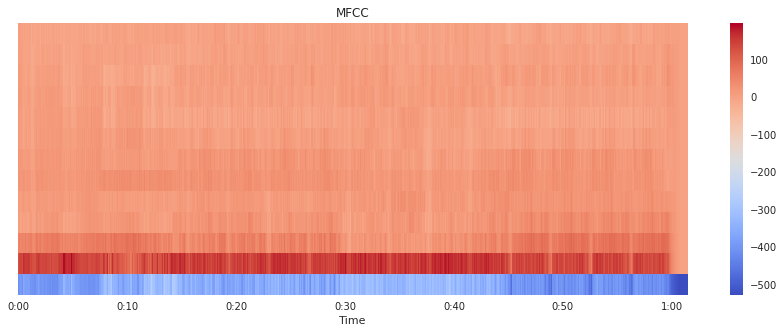

In [260]:
mfccs = librosa.feature.mfcc(y=y_harmonic, sr=sr, n_mfcc=13)
plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')


###4. Spectral Centroid

The spectral centroid is a measure used in digital signal processing to characterise a spectrum. It indicates where the "center of mass" of the spectrum is. Perceptually, it has a robust connection with the impression of "brightness" of a sound.

/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


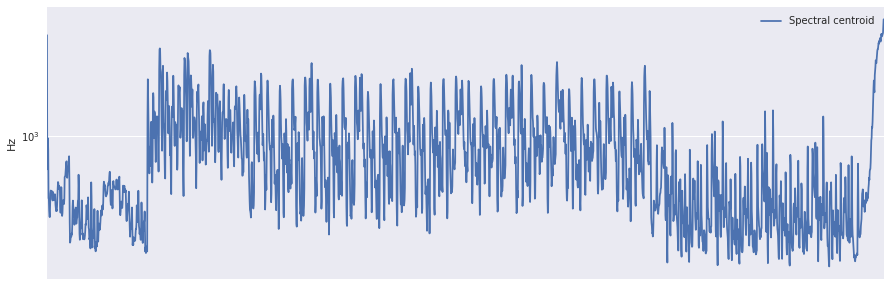

In [261]:
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
plt.legend()

###5. Spectral Contrast

OSC was developed to represent the spectral characteristics
of a music piece. It considers the spectral peak and valley in
each sub-band separately. In general, spectral peaks
correspond to harmonic components and spectral valleys
correspond to non-harmonic components or noise in a
music piece. Therefore, the difference between spectral
peaks and spectral valleys will reflect the spectral contrast
distribution. 

/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


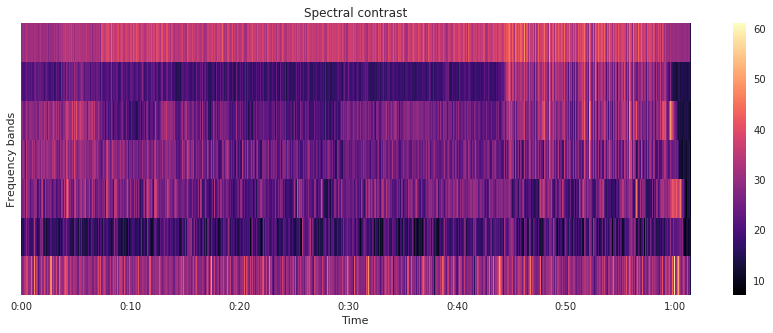

In [262]:
contrast=librosa.feature.spectral_contrast(y=y_harmonic,sr=sr)
plt.figure(figsize=(15,5))
librosa.display.specshow(contrast, x_axis='time')
plt.colorbar()
plt.ylabel('Frequency bands')
plt.title('Spectral contrast')

###6. Spectral Rolloff

Spectral rolloff point is defined as the Nth percentile of the power spectral distribution, where N is usually 85% or 95%. The rolloff point is the frequency below which the N% of the magnitude distribution is concentrated.

This measure is useful in distinguishing voiced speech from unvoiced: unvoiced speech has a high proportion of energy contained in the high-frequency range of the spectrum, where most of the energy for voiced speech and music is contained in lower bands.


/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


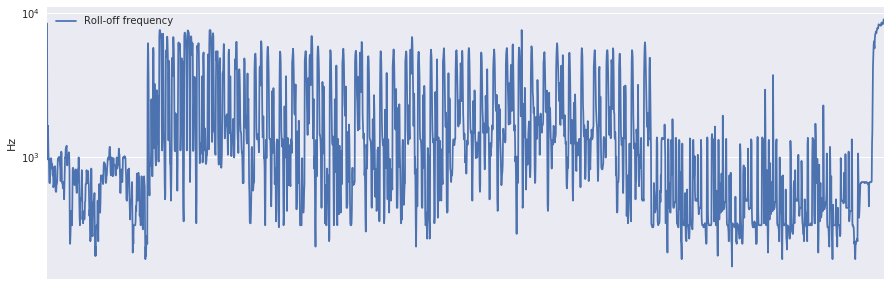

In [263]:
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
plt.figure(figsize=(15,5))
plt.semilogy(rolloff.T, label='Roll-off frequency')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, rolloff.shape[-1]])
plt.legend()

###7. Zero Crossing Rate

A zero crossing point, is a point in a digital audio file where the sample is at zero amplitude. At any other point, the amplitude of the wave is rising towards its peak or sinking towards its trough.

The zero-crossing rate is the rate of sign-changes along a signal, i.e., the rate at which the signal changes from positive to negative or back. This feature has been used heavily in both speech recognition and music information retrieval, being a key feature to classify percussive sounds.

/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


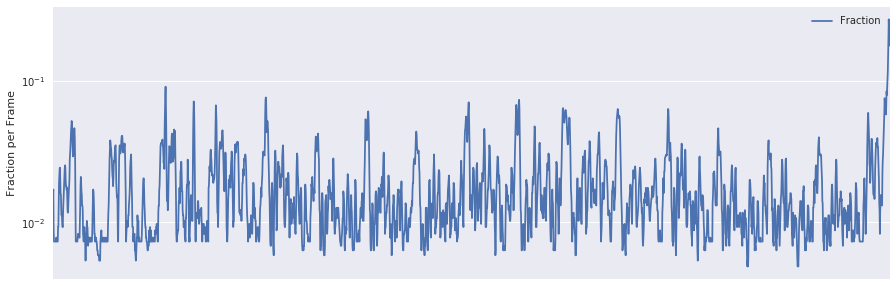

In [264]:
zrate=librosa.feature.zero_crossing_rate(y_harmonic)
plt.figure(figsize=(15,5))
plt.semilogy(zrate.T, label='Fraction')
plt.ylabel('Fraction per Frame')
plt.xticks([])
plt.xlim([0, rolloff.shape[-1]])
plt.legend()

##Feature Generation

This section will use the features extracted in the previous section and generate summary features for the entire song.

###1. Chroma Energy Normalized

The output of CENS contains the 12 element representation of the chroma energy thoroughout the song. The 12 element each will be summarized using mean and standard deviation accross the entire song.


,chroma_mean_0,chroma_mean_1,chroma_mean_2,chroma_mean_3,chroma_mean_4,chroma_mean_5,chroma_mean_6,chroma_mean_7,chroma_mean_8,chroma_mean_9,...,chroma_std_2,chroma_std_3,chroma_std_4,chroma_std_5,chroma_std_6,chroma_std_7,chroma_std_8,chroma_std_9,chroma_std_10,chroma_std_11
0,0.190272,0.150772,0.155224,0.340839,0.401257,0.302176,0.126165,0.132759,0.195258,0.185639,...,0.137254,0.226113,0.227779,0.128654,0.11346,0.164156,0.230217,0.219598,0.172701,0.154193


/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


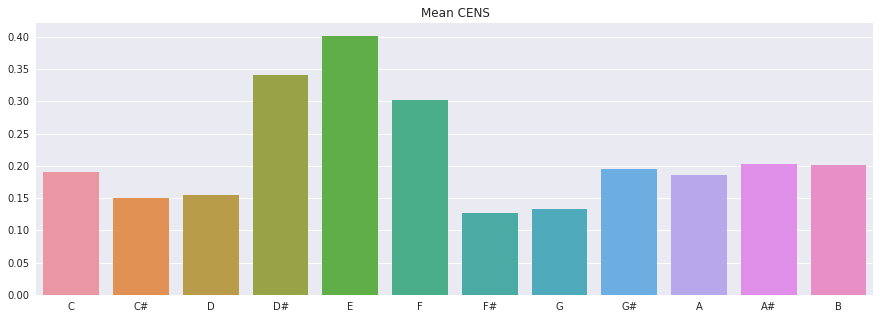

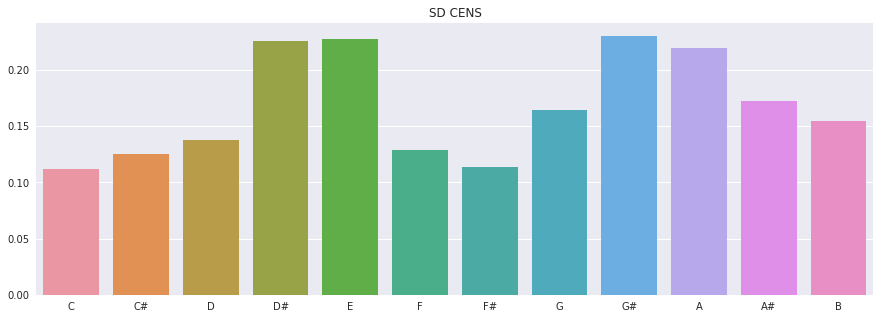

In [265]:
chroma_mean=np.mean(chroma,axis=1)
chroma_std=np.std(chroma,axis=1)
#plot the summary
octave=['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']
plt.figure(figsize=(15,5))
plt.title('Mean CENS')
sns.barplot(x=octave,y=chroma_mean)

plt.figure(figsize=(15,5))
plt.title('SD CENS')
sns.barplot(x=octave,y=chroma_std)
#Generate the chroma Dataframe
chroma_df=pd.DataFrame()
for i in range(0,12):
    chroma_df['chroma_mean_'+str(i)]=chroma_mean[i]
for i in range(0,12):
    chroma_df['chroma_std_'+str(i)]=chroma_mean[i]
chroma_df.loc[0]=np.concatenate((chroma_mean,chroma_std),axis=0)

chroma_df

###2. MFCCs

To characterize the whole music
piece, the mean and standard deviation of MFCC of all
frames in a music piece are used as features. 

,mfccs_mean_0,mfccs_mean_1,mfccs_mean_2,mfccs_mean_3,mfccs_mean_4,mfccs_mean_5,mfccs_mean_6,mfccs_mean_7,mfccs_mean_8,mfccs_mean_9,...,mfccs_std_3,mfccs_std_4,mfccs_std_5,mfccs_std_6,mfccs_std_7,mfccs_std_8,mfccs_std_9,mfccs_std_10,mfccs_std_11,mfccs_std_12
0,-366.980203,141.970752,53.233172,23.805306,18.531085,26.322261,18.861333,7.818147,1.041286,6.361186,...,14.406343,9.510932,9.159846,10.69787,8.91174,10.036141,7.90209,9.112007,6.170604,6.218438


/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


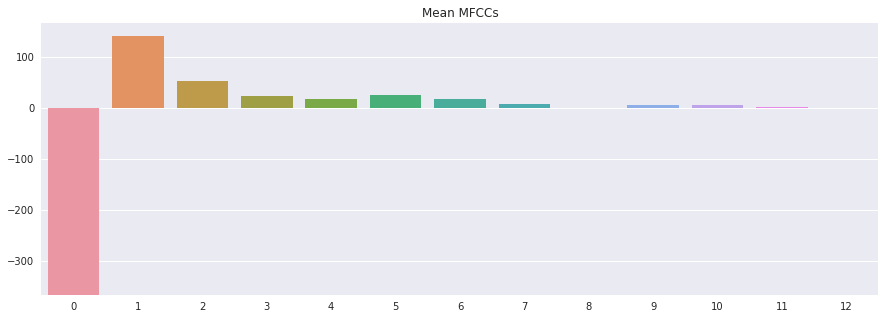

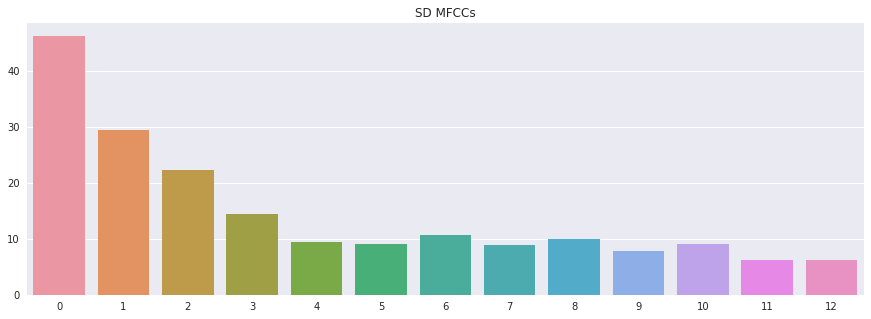

In [266]:
mfccs_mean=np.mean(mfccs,axis=1)
mfccs_std=np.std(mfccs,axis=1)

coeffs=np.arange(0,13)
plt.figure(figsize=(15,5))
plt.title('Mean MFCCs')
sns.barplot(x=coeffs,y=mfccs_mean)

plt.figure(figsize=(15,5))
plt.title('SD MFCCs')
sns.barplot(x=coeffs,y=mfccs_std)
#Generate the chroma Dataframe
mfccs_df=pd.DataFrame()
for i in range(0,13):
    mfccs_df['mfccs_mean_'+str(i)]=mfccs_mean[i]
for i in range(0,13):
    mfccs_df['mfccs_std_'+str(i)]=mfccs_mean[i]
mfccs_df.loc[0]=np.concatenate((mfccs_mean,mfccs_std),axis=0)
mfccs_df

###3. Spectral Features

####Spectral Centroid

In [267]:
cent_mean=np.mean(cent)
cent_std=np.std(cent)
cent_skew=scipy.stats.skew(cent,axis=1)[0]
print('Mean: '+str(cent_mean))
print('SD: '+str(cent_std))
print('Skewness: '+str(cent_skew))

Mean: 833.670919063
SD: 667.201273888
Skewness: 1.91201553451


####Spectral Contrast

/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


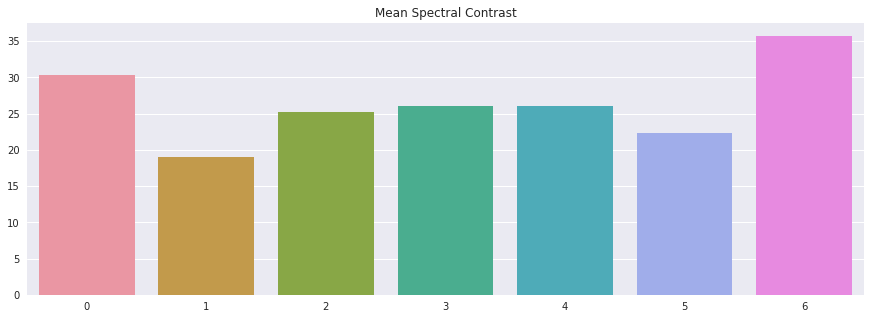

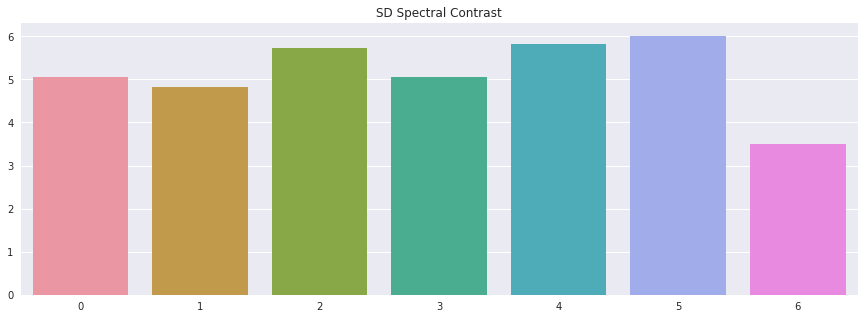

In [268]:
contrast_mean=np.mean(contrast,axis=1)
contrast_std=np.std(contrast,axis=1)

conts=np.arange(0,7)
plt.figure(figsize=(15,5))
plt.title('Mean Spectral Contrast')
sns.barplot(x=conts,y=contrast_mean)

plt.figure(figsize=(15,5))
plt.title('SD Spectral Contrast')
sns.barplot(x=conts,y=contrast_std)
#Generate the chroma Dataframe
contrast_df=pd.DataFrame()

####Spectral Rolloff

In [269]:
rolloff_mean=np.mean(rolloff)
rolloff_std=np.std(rolloff)
rolloff_skew=scipy.stats.skew(rolloff,axis=1)[0]
print('Mean: '+str(rolloff_mean))
print('SD: '+str(rolloff_std))
print('Skewness: '+str(rolloff_skew))

Mean: 1667.91619566
SD: 1766.92961628
Skewness: 1.78492806278


In [270]:
spectral_df=pd.DataFrame()
collist=['cent_mean','cent_std','cent_skew']
for i in range(0,7):
    collist.append('contrast_mean_'+str(i))
for i in range(0,7):
    collist.append('contrast_std_'+str(i))
collist=collist+['rolloff_mean','rolloff_std','rolloff_skew']
for c in collist:
    spectral_df[c]=0
data=np.concatenate(([cent_mean,cent_std,cent_skew],contrast_mean,contrast_std,[rolloff_mean,rolloff_std,rolloff_std]),axis=0)
spectral_df.loc[0]=data
spectral_df

,cent_mean,cent_std,cent_skew,contrast_mean_0,contrast_mean_1,contrast_mean_2,contrast_mean_3,contrast_mean_4,contrast_mean_5,contrast_mean_6,contrast_std_0,contrast_std_1,contrast_std_2,contrast_std_3,contrast_std_4,contrast_std_5,contrast_std_6,rolloff_mean,rolloff_std,rolloff_skew
0,833.670919,667.201274,1.912016,30.34398,18.991142,25.208482,26.018138,26.052661,22.300056,35.720847,5.062705,4.827513,5.719714,5.067039,5.828964,6.009178,3.495014,1667.916196,1766.929616,1766.929616


###4. Zero Crossing Rate

In [271]:
zrate_mean=np.mean(zrate)
zrate_std=np.std(zrate)
zrate_skew=scipy.stats.skew(zrate,axis=1)[0]
print('Mean: '+str(zrate_mean))
print('SD: '+str(zrate_std))
print('Skewness: '+str(zrate_skew))

Mean: 0.0178924549018
SD: 0.0149476024591
Skewness: 5.44567303453


In [272]:
zrate_df=pd.DataFrame()
zrate_df['zrate_mean']=0
zrate_df['zrate_std']=0
zrate_df['zrate_skew']=0
zrate_df.loc[0]=[zrate_mean,zrate_std,zrate_skew]
zrate_df

,zrate_mean,zrate_std,zrate_skew
0,0.017892,0.014948,5.445673


###5. Beat and Tempo

In [273]:
beat_df=pd.DataFrame()
beat_df['tempo']=tempo
beat_df.loc[0]=tempo
beat_df

,tempo
0,129.199219


##Generate the Final DataFrame

In [276]:
final_df=pd.concat((chroma_df,mfccs_df,spectral_df,zrate_df,beat_df),axis=1)
final_df.head()

,chroma_mean_0,chroma_mean_1,chroma_mean_2,chroma_mean_3,chroma_mean_4,chroma_mean_5,chroma_mean_6,chroma_mean_7,chroma_mean_8,chroma_mean_9,...,contrast_std_4,contrast_std_5,contrast_std_6,rolloff_mean,rolloff_std,rolloff_skew,zrate_mean,zrate_std,zrate_skew,tempo
0,0.190272,0.150772,0.155224,0.340839,0.401257,0.302176,0.126165,0.132759,0.195258,0.185639,...,5.828964,6.009178,3.495014,1667.916196,1766.929616,1766.929616,0.017892,0.014948,5.445673,129.199219
